<a href="https://colab.research.google.com/github/ShyamSundhar1411/My-ML-Notebooks/blob/master/Computer%20Vision/Introduction_to_Computer_Vision_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow
Computer Vision : Practice of writing algorithms which can discover patterns in visual data

## Getting Data

In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-01-08 18:55:07--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  23.5MB/s    in 5.5s    

2023-01-08 18:55:14 (19.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

## Inspecting the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print("There are ",len(dirnames)," directories",len(filenames)," in ",dirpath)

There are  2  directories 0  in  pizza_steak
There are  2  directories 0  in  pizza_steak/train
There are  0  directories 750  in  pizza_steak/train/pizza
There are  0  directories 750  in  pizza_steak/train/steak
There are  2  directories 0  in  pizza_steak/test
There are  0  directories 250  in  pizza_steak/test/pizza
There are  0  directories 250  in  pizza_steak/test/steak


In [6]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

## Visualizing Images

In [7]:
import pathlib
import numpy as np
train_data_directory = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in train_data_directory.glob("*")]))

In [8]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  target_folder = target_dir+"/"+target_class
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(img.shape)
  return img

['861771.jpg']
(512, 384, 3)


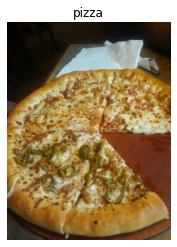

In [10]:
img = view_random_image("pizza_steak/train","pizza")

## End-End CNN Model

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)


In [12]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(
    train_dir,batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed=42
    )
validation_data = valid_datagen.flow_from_directory(
    test_dir,batch_size = 32,
    target_size = (224,224),
    class_mode = "binary",
    seed=42
    )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [14]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation = "relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_1.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [15]:
len(train_data)

47

In [16]:
history_1 = model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data = validation_data,
            validation_steps = len(validation_data)
            )

Epoch 1/5
47/47 [==============================] - 22s 206ms/step - loss: 0.5836 - accuracy: 0.6780 - val_loss: 0.4464 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4300 - accuracy: 0.8040 - val_loss: 0.3531 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 9s 191ms/step - loss: 0.3943 - accuracy: 0.8193 - val_loss: 0.3237 - val_accuracy: 0.8760
Epoch 4/5
47/47 [==============================] - 9s 193ms/step - loss: 0.3683 - accuracy: 0.8440 - val_loss: 0.3080 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3242 - accuracy: 0.8673 - val_loss: 0.3133 - val_accuracy: 0.8700


In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Non-CNN Model for Image Data

In [18]:
tf.random.set_seed(42)

In [19]:
model_2 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (224,224,3) ),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(4,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model_2.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history_2 = model_2.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = validation_data,validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 10s 198ms/step - loss: 1.0243 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 13s 269ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape = (224,224,3) ),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(100,activation = "relu"),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model_3.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history_3 = model_3.fit(train_data,epochs = 5,steps_per_epoch=len(train_data),validation_data = validation_data,validation_steps=len(validation_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 3.6400 - accuracy: 0.6093 - val_loss: 2.1893 - val_accuracy: 0.6100
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.9787 - accuracy: 0.6987 - val_loss: 0.6431 - val_accuracy: 0.7040
Epoch 3/5
47/47 [==============================] - 9s 182ms/step - loss: 0.6381 - accuracy: 0.7240 - val_loss: 0.4304 - val_accuracy: 0.7880
Epoch 4/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4900 - accuracy: 0.7820 - val_loss: 0.4501 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4766 - accuracy: 0.7780 - val_loss: 0.4403 - val_accuracy: 0.7780


## Breaking CNN

### 1. Become one with data

['2499364.jpg']
(512, 512, 3)
['1044789.jpg']
(512, 512, 3)


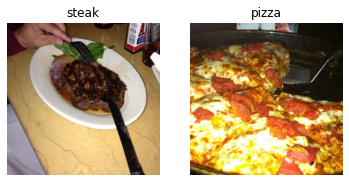

In [22]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train","pizza")

### 2. Preprocessing Data

In [23]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [24]:
## Create train and test data generates and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [25]:
train_data = train_datagen.flow_from_directory(directory=train_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)
test_data = test_datagen.flow_from_directory(directory=test_dir,target_size = (224,224),class_mode = "binary",batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [27]:
len(train_data)

47

In [28]:
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

### 3. Baseline Model

In [29]:
model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters = 10,
        kernel_size = 3,
        activation = "relu",
        input_shape = (224,224,3),
        padding = "valid",
        strides = (1,1)
        ),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid"),
])
model_4.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [30]:
len(train_data),len(test_data)

(47, 16)

In [31]:
history_4 = model_4.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 216ms/step - loss: 1.6928 - accuracy: 0.6127 - val_loss: 0.5137 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4846 - accuracy: 0.7927 - val_loss: 0.4280 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 9s 188ms/step - loss: 0.3787 - accuracy: 0.8440 - val_loss: 0.3493 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 10s 209ms/step - loss: 0.2730 - accuracy: 0.8953 - val_loss: 0.3518 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 191ms/step - loss: 0.1278 - accuracy: 0.9613 - val_loss: 0.3680 - val_accuracy: 0.8480


In [32]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]
  val_loss = history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  #Plot Loss
  plt.plot(epochs,loss,label = "training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  #Plot Accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label = "training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()


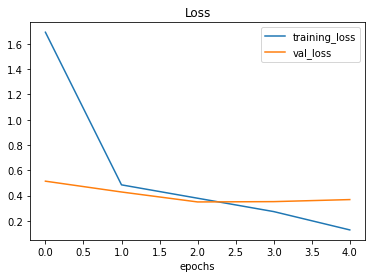

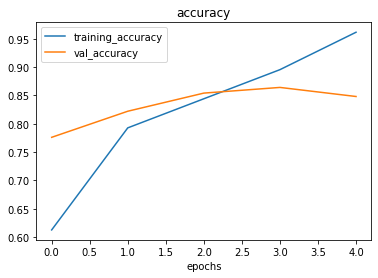

In [33]:
plot_loss_curves(history_4)

### 4. Reducing overfitting using MaxPool2D


In [34]:
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10,3,activation = "relu",input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])
model_5.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [35]:
history_5 = model_5.fit(train_data,epochs = 5,steps_per_epoch = len(train_data),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 189ms/step - loss: 0.6284 - accuracy: 0.6280 - val_loss: 0.4753 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4902 - accuracy: 0.7727 - val_loss: 0.4326 - val_accuracy: 0.7900
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4354 - accuracy: 0.8067 - val_loss: 0.3930 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 9s 182ms/step - loss: 0.4355 - accuracy: 0.8027 - val_loss: 0.4460 - val_accuracy: 0.7900
Epoch 5/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4142 - accuracy: 0.8113 - val_loss: 0.3308 - val_accuracy: 0.8480


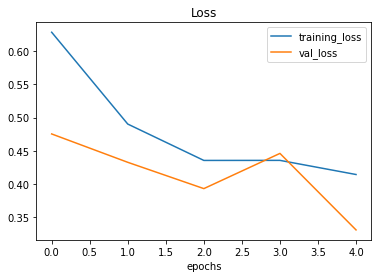

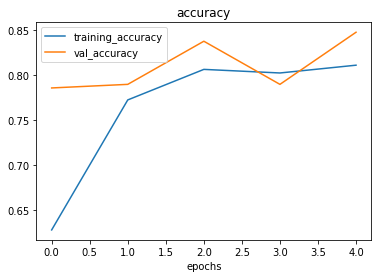

In [36]:
plot_loss_curves(history_5)

### 5. Reducing Overfitting using Data Augmentation

In [37]:
train_datagen_augmented = ImageDataGenerator(
    rescale = 1/255.,rotation_range=0.2,
    shear_range = 0.2,zoom_range = 0.2,width_shift_range = 0.2,height_shift_range=0.3,horizontal_flip=True
    )

In [38]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode = "binary",shuffle = False)

Found 1500 images belonging to 2 classes.


In [39]:
images,labels = train_data_augmented.next()

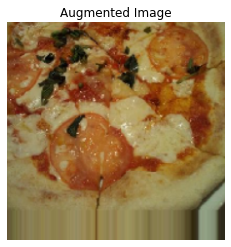

In [40]:
plt.imshow(images[0])
plt.title("Augmented Image")
plt.axis(False);

### 6. Training on Augmented Data

In [41]:
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size = 3,
        strides = (1,1),
        padding = "valid",activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_6.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [42]:
history_6 = model_6.fit(train_data_augmented,epochs = 5,steps_per_epoch = len(train_data_augmented),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 457ms/step - loss: 0.7085 - accuracy: 0.5647 - val_loss: 0.6886 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 21s 449ms/step - loss: 0.7148 - accuracy: 0.5167 - val_loss: 0.6846 - val_accuracy: 0.6400
Epoch 3/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6876 - accuracy: 0.6020 - val_loss: 0.6359 - val_accuracy: 0.7300
Epoch 4/5
47/47 [==============================] - 28s 608ms/step - loss: 0.6916 - accuracy: 0.5600 - val_loss: 0.6027 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 24s 515ms/step - loss: 0.7061 - accuracy: 0.5707 - val_loss: 0.6761 - val_accuracy: 0.5860


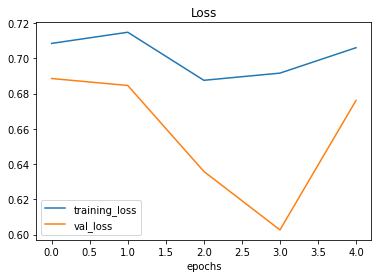

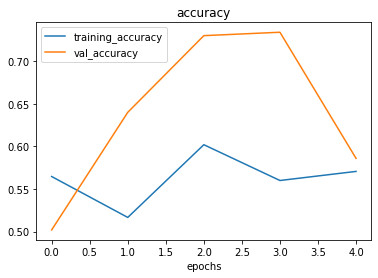

In [43]:
plot_loss_curves(history_6)

### 7. Shuffling Augmented Data

In [44]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode = "binary",shuffle = True)

Found 1500 images belonging to 2 classes.


In [45]:
model_7 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size = 3,
        strides = (1,1),
        padding = "valid",activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_7.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [46]:
history_7 = model_7.fit(train_data_augmented_shuffled,epochs = 5,steps_per_epoch = len(train_data_augmented_shuffled),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 28s 580ms/step - loss: 0.6482 - accuracy: 0.6253 - val_loss: 0.5445 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 27s 567ms/step - loss: 0.5498 - accuracy: 0.7207 - val_loss: 0.4871 - val_accuracy: 0.7420
Epoch 3/5
47/47 [==============================] - 24s 521ms/step - loss: 0.4978 - accuracy: 0.7613 - val_loss: 0.3534 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 35s 739ms/step - loss: 0.4836 - accuracy: 0.7600 - val_loss: 0.3847 - val_accuracy: 0.8140
Epoch 5/5
47/47 [==============================] - 26s 547ms/step - loss: 0.4682 - accuracy: 0.7807 - val_loss: 0.4792 - val_accuracy: 0.7820


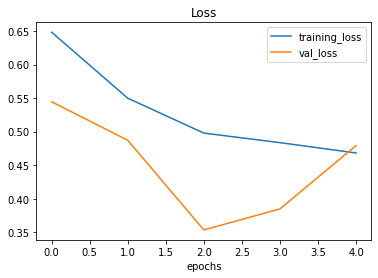

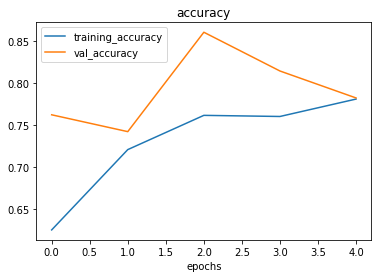

In [47]:
plot_loss_curves(history_7)

In [48]:
model_8 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=10,
        kernel_size = 3,
        strides = (1,1),
        padding = "valid",activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid"),
])
model_8.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [49]:
history_8 = model_8.fit(train_data_augmented_shuffled,epochs = 7,steps_per_epoch = len(train_data_augmented_shuffled),validation_data = test_data,validation_steps = len(test_data))

Epoch 1/7
47/47 [==============================] - 22s 465ms/step - loss: 0.6871 - accuracy: 0.5480 - val_loss: 0.6724 - val_accuracy: 0.5180
Epoch 2/7
47/47 [==============================] - 22s 461ms/step - loss: 0.6178 - accuracy: 0.6673 - val_loss: 0.4249 - val_accuracy: 0.8100
Epoch 3/7
47/47 [==============================] - 22s 477ms/step - loss: 0.5552 - accuracy: 0.7273 - val_loss: 0.3900 - val_accuracy: 0.8320
Epoch 4/7
47/47 [==============================] - 23s 477ms/step - loss: 0.5328 - accuracy: 0.7447 - val_loss: 0.3876 - val_accuracy: 0.8420
Epoch 5/7
47/47 [==============================] - 22s 467ms/step - loss: 0.5412 - accuracy: 0.7400 - val_loss: 0.3751 - val_accuracy: 0.8440
Epoch 6/7
47/47 [==============================] - 27s 586ms/step - loss: 0.5133 - accuracy: 0.7593 - val_loss: 0.4129 - val_accuracy: 0.8560
Epoch 7/7
47/47 [==============================] - 22s 458ms/step - loss: 0.5015 - accuracy: 0.7647 - val_loss: 0.4109 - val_accuracy: 0.8300


## Making Prediction with trained model

In [50]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2023-01-08 19:07:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.007s  

2023-01-08 19:07:28 (281 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



In [51]:
def load_and_prep_image(filename,img_shape=224):
  """Reads an image from filename and preprocess it to tensor and reshapes it to (img_shape,img_shape,color channels)"""
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img,[img_shape,img_shape])
  img = img/255.
  return img


In [52]:
steak = load_and_prep_image("03-steak.jpeg")

In [53]:
pred = model_8.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 219ms/step


array([[0.87102133]], dtype=float32)

In [54]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [55]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [56]:
def pred_and_plot(model,filename,class_names=class_names):
  """Imports an image located at filename, make a prediction with model and plots the image with predicted class as the title"""
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img,axis=0))
  pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title("Prediction: "+pred_class)
  plt.axis(False);

1/1 [==============================] - 0s 21ms/step


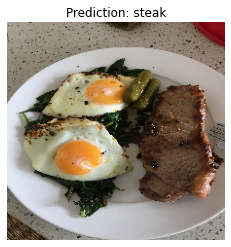

In [57]:
pred_and_plot(model_8,"03-steak.jpeg")

In [58]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg

--2023-01-08 19:07:29--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.01s   

2023-01-08 19:07:29 (197 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



1/1 [==============================] - 0s 20ms/step


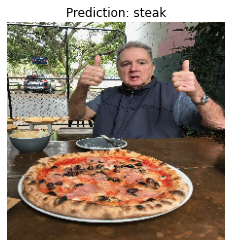

In [59]:
pred_and_plot(model_8,"03-pizza-dad.jpeg")

## Multi-Class Image Classification

### 1. Import and Become one with data

In [60]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-01-08 19:07:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  24.6MB/s    in 22s     

2023-01-08 19:07:54 (22.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [61]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

In [62]:
import os
# Walk through
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
  print("There are ",len(dirnames)," directories and ",len(filenames)," images in ",dirpath)

There are  2  directories and  0  images in  10_food_classes_all_data
There are  10  directories and  0  images in  10_food_classes_all_data/train
There are  0  directories and  750  images in  10_food_classes_all_data/train/fried_rice
There are  0  directories and  750  images in  10_food_classes_all_data/train/pizza
There are  0  directories and  750  images in  10_food_classes_all_data/train/chicken_wings
There are  0  directories and  750  images in  10_food_classes_all_data/train/ice_cream
There are  0  directories and  750  images in  10_food_classes_all_data/train/steak
There are  0  directories and  750  images in  10_food_classes_all_data/train/sushi
There are  0  directories and  750  images in  10_food_classes_all_data/train/hamburger
There are  0  directories and  750  images in  10_food_classes_all_data/train/ramen
There are  0  directories and  750  images in  10_food_classes_all_data/train/grilled_salmon
There are  0  directories and  750  images in  10_food_classes_all_

In [63]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [64]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

['1615378.jpg']
(512, 512, 3)


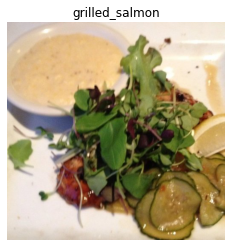

In [72]:
import random
img = view_random_image(target_dir = train_dir,target_class = random.choice(class_names))

### 2. Preprocess the data

In [80]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [82]:
train_data = train_datagen.flow_from_directory(train_dir,batch_size = 32,target_size = (224,224),class_mode = "sparse")
test_data = test_datagen.flow_from_directory(test_dir,batch_size = 32,target_size = (224,224),class_mode = "sparse")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [83]:
len(train_data)

235

In [84]:
7500/32

234.375

### 3. Baseline CNN

In [92]:
multi_model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
      kernel_size = 3,
      strides = (1,1),
      padding ="valid",
      activation = "relu",
      input_shape = (224,224,3)
      ),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = "softmax"),
])
multi_model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = "adam",metrics = ["accuracy"])

In [93]:
multi_model_1.fit(train_data,steps_per_epoch = len(train_data),epochs = 5,validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 196ms/step - loss: 2.4677 - accuracy: 0.1689 - val_loss: 2.1979 - val_accuracy: 0.1932
Epoch 2/5
235/235 [==============================] - 44s 186ms/step - loss: 1.7258 - accuracy: 0.4323 - val_loss: 2.2739 - val_accuracy: 0.1856
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 0.4505 - accuracy: 0.8752 - val_loss: 3.3721 - val_accuracy: 0.1988
Epoch 4/5
235/235 [==============================] - 45s 190ms/step - loss: 0.0413 - accuracy: 0.9928 - val_loss: 5.1763 - val_accuracy: 0.1756
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.0104 - accuracy: 0.9988 - val_loss: 5.7126 - val_accuracy: 0.1960


In [94]:
multi_model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
      kernel_size = 3,
      strides = (1,1),
      padding ="valid",
      activation = "relu",
      input_shape = (224,224,3)
      ),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.Conv2D(10,3,activation = "relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation = "softmax"),
])
multi_model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),optimizer = "adam",metrics = ["accuracy"])

In [96]:
history_multi_2 = multi_model_2.fit(train_data,steps_per_epoch = len(train_data),epochs = 5,validation_data = test_data,validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 186ms/step - loss: 2.0993 - accuracy: 0.2403 - val_loss: 1.9560 - val_accuracy: 0.3020
Epoch 2/5
235/235 [==============================] - 44s 189ms/step - loss: 1.8860 - accuracy: 0.3467 - val_loss: 1.9008 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.7092 - accuracy: 0.4231 - val_loss: 1.8849 - val_accuracy: 0.3224
Epoch 4/5
235/235 [==============================] - 44s 186ms/step - loss: 1.3626 - accuracy: 0.5485 - val_loss: 2.0298 - val_accuracy: 0.3024
Epoch 5/5
235/235 [==============================] - 45s 190ms/step - loss: 0.8185 - accuracy: 0.7309 - val_loss: 2.4859 - val_accuracy: 0.2972


### 4. Evaluating the Model

In [97]:
multi_model_2.evaluate(test_data)

79/79 [==============================] - 11s 137ms/step - loss: 2.4859 - accuracy: 0.2972


[2.4858615398406982, 0.2971999943256378]

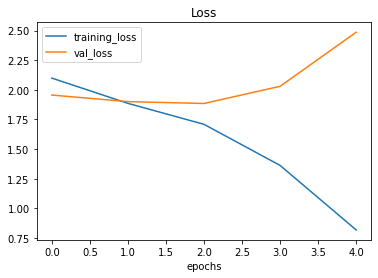

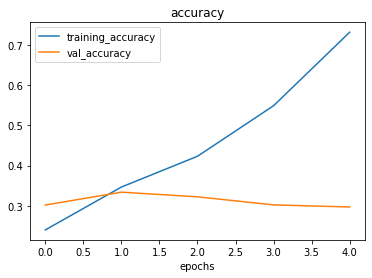

In [98]:
plot_loss_curves(history_multi_2)

### 6. Adjust the Hyperparameters of baseline model